In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')


## Order of Operations 
- Read csv(s)
- Removing unnessary headers from dataframe of WDI Data (df)
- Filter the dataframe (df) for relevant country names 
- Filer the dataframe (df) for relevant indicators

In [2]:
#to read csv of data
df= pd.read_csv('../WDIData.csv')

#to read csv of country names
df_country_names= pd.read_csv('WDI_Country_Code_and_Names.csv',encoding = "ISO-8859-1")

#to read csv of indicators
df_list_indicators = pd.read_csv('WDI_list_of_reviewed_indicators.csv')

### <font color = red> Dataframe Cleanup </font>

#### Removing Columns

In [3]:
#to grab the headers of the dataset
df_headers=list(df.columns.values)

In [4]:
# to count the number of headers
len(df_headers)

63

In [5]:
#only pull the headers that are years
df_years = df_headers[-59:]

In [6]:
#only select previous years before 2010
df_years_drop = df_years[0:50]
#to make column '2018' a list
df_years_drop_2018 = list([df_years[-1]])

# to combine lists of years into 1 drop line
df_drop = df_years_drop + df_years_drop_2018

In [7]:
#to drop the years and create a summarized df
df_columns_removed = df.drop(df_drop,axis=1)
df_columns_removed.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,74.543489,75.770972,76.772916,78.839139,77.487377,78.564439,78.958780,NaN


#### Filter by Country Names

In [8]:
#to preview df_country_names
df_country_names.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code
0,ABW,Aruba,Aruba,Aruba,AW
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF
2,AGO,Angola,Angola,People's Republic of Angola,AO
3,ALB,Albania,Albania,Republic of Albania,AL
4,AND,Andorra,Andorra,Principality of Andorra,AD


In [9]:
#make a list of country short name
country_short_names = list(df_country_names['Short Name'])

In [10]:
#filter df by short names list
df_filter_cols_nd_cols_rem = df_columns_removed.loc[df_columns_removed['Country Name'].isin(country_short_names)]

In [11]:
#source[filterdfbyalist]: https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe

In [12]:
df_filter_cols_nd_cols_rem.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017
57564,Pacific island small states,PSS,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57565,Pacific island small states,PSS,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57566,Pacific island small states,PSS,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,25.958323,26.285890,26.535749,26.782890,27.085270,27.257535,27.474560,NaN
57567,Pacific island small states,PSS,Access to electricity (% of population),EG.ELC.ACCS.ZS,68.566481,70.510341,72.004083,72.806889,75.017881,79.515976,79.548083,NaN
57568,Pacific island small states,PSS,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,55.876132,58.485068,60.480956,61.882117,64.464801,71.707699,71.011807,NaN


#### Filter Data by Indicators

In [13]:
df_list_indicators.head()

,Indicator Name
0,Adjusted net national income (constant 2010 US$)
1,Adjusted net national income per capita (annua...
2,Adjusted net national income per capita (const...
3,Agricultural methane emissions (thousand metri...
4,Agricultural nitrous oxide emissions (thousand...


#### Per the word doc: 'World_Dev_Indicators_Reviewed_Subjects.docx'

Required & Optional indicators for chart preference:

- PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)
- GDP (constant 2010 US$)
- GDP growth (annual %)
- Population, total
- Population growth (annual %)

In [14]:
req_nd_opti_indicators = df_list_indicators.loc[df_list_indicators['Indicator Name'].isin([
    'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
    'GDP (constant 2010 US$)',
    'GDP growth (annual %)',
    'Population, total',
    'Population growth (annual %)'
])]

req_nd_opti_indicators

,Indicator Name
11,GDP (constant 2010 US$)
12,GDP growth (annual %)
16,"PM2.5 air pollution, mean annual exposure (mic..."
18,Population growth (annual %)
19,"Population, total"


In [15]:
#to make a list of indicators for filter
list_indicators = list(req_nd_opti_indicators['Indicator Name'])

In [16]:
#filter by indicators
df_countries_indiciator = df_filter_cols_nd_cols_rem.loc[df_filter_cols_nd_cols_rem['Indicator Name'].isin(list_indicators )]

#### <font color = purple> Final Dataframe Edit </font>

In [17]:
#remove unnessecary columns
df_final = df_countries_indiciator.drop(['Country Code','Indicator Code'],axis=1)

### <font color = 'maroon'> Analysis Agenda for Air Pollution, Population & GDP </font>
####  1. Logic for calculating bins (using GDP as example):
Objective: To split data into bucket categories to review correlation per metric reviewed 

1. A Subtotal by column (Total GDP per Year)
2. A Subtotal by row (Total GDP per Country & Total GDP Overall)
3. Calulate % of GDP per country vs GDP Overall to get bins 
4. Use .describe to review breakdown of % data
5. Assign bins from Very Low to Very High 

#### 2. Ensure bins are properly distributing data
Objective: If there is a large std between the countries in the bins then our data will still be skewed and our bins will need readjusting
1. Create a pie chart of bins per country
2. If part of the pie is too large, then we'll review and break it out into smaller bins



### <font  color = blue >Dataframe for Air Pollution </font>

In [18]:
#filter df by air pollution
air_pollu_df = df_final.loc[df_final["Indicator Name"]== 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'].round(2)

#### <font color = red> Reviewing Air Pollution data for 2009 </font>
I'm not including 2009 in the other data sets, becuase they have % annual growth. Meanwhile, air pollution doesn't have % growth. 

By adding 2009's data we can calculate % growth for 2010 in order to have complete data from 2010 - 2018.

In [19]:
#to get the column for 2009
#only select previous years before 2010
df_years_drop_air = df_years[0:49]
#to make column '2018' a list
df_years_drop_2018_air = list([df_years[-1]])

# to combine lists of years into 1 drop line
df_drop_air = df_years_drop_air + df_years_drop_2018_air 

In [20]:
#to drop the years and create a summarized df
df_columns_removed_air = df.drop(df_drop_air,axis=1)

#to remove extra columns, and to filter the data by country:
df_air = df_columns_removed_air.drop(['Country Code','Indicator Code'],axis=1).loc[df_columns_removed_air['Country Name'].isin(country_short_names)].loc[df_columns_removed_air['Indicator Name']== 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'].set_index('Country Name').reset_index() 
df_air.head(3)

,Country Name,Indicator Name,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Pacific island small states,"PM2.5 air pollution, mean annual exposure (mic...",NaN,13.846417,14.037205,13.060916,12.448042,12.005876,11.990358,11.295988,11.255127
1,Small states,"PM2.5 air pollution, mean annual exposure (mic...",NaN,29.200931,29.451034,29.894694,29.687221,28.716533,31.238818,29.867332,30.245968
2,Afghanistan,"PM2.5 air pollution, mean annual exposure (mic...",NaN,65.245592,66.835727,66.023174,61.366745,59.010330,61.252656,56.287047,56.910808


#### <font color=red> Conclusion of 2009 Air Pollution Data </font>

From the table above, we can see there is no data in 2009 for PM2.5 thus, when completing your charts use the years 2011 - 2017. 

Since we do not need air data for 2009 I'll discontinue dataframe "df_air" and use going forward "air_pollu_df".

In [21]:
#create a df for percent change of air pollution

air_pollu_df_1 = air_pollu_df.drop('Indicator Name', axis = 1).set_index('Country Name').dropna()
air_pollu_pct_change = air_pollu_df_1.pct_change(axis='columns')


In [22]:
air_pollu_df_1= air_pollu_df_1.reset_index()
air_pollu_df_1.head()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017
0,Pacific island small states,13.85,14.04,13.06,12.45,12.01,11.99,11.30,11.26
1,Small states,29.20,29.45,29.89,29.69,28.72,31.24,29.87,30.25
2,Afghanistan,65.25,66.84,66.02,61.37,59.01,61.25,56.29,56.91
3,Albania,21.28,22.77,20.58,19.94,18.88,19.51,18.19,18.20
4,Algeria,33.64,33.83,33.37,34.25,35.56,36.09,39.85,38.88


In [23]:
#to create a subtotals row for annual air_pollution
air_pollu_annual_totals_per_year = air_pollu_df_1.iloc[:,1:].sum(axis = 0).round(2)
air_pollu_totals_per_year = list(air_pollu_annual_totals_per_year.values)
air_pollu_totals_per_year

[4933.41, 4986.47, 4872.96, 4745.59, 4565.11, 4864.26, 4624.9, 4647.73]

In [24]:
#make subtotal list into dataframe,using in a row format
air_pollu_subtotals = pd.DataFrame({'Total PM2.5 per Year':air_pollu_totals_per_year }).T
#to rename index to fit 'air_pollu_df_1'
air_pollu_subtotals.index.name = 'Country Name'
air_pollu_subtotals = air_pollu_subtotals.rename(columns = {0: '2010',
                                                            1:"2011",
                                                            2:'2012',
                                                            3:'2013',
                                                            4:'2014',
                                                            5:'2015',
                                                            6:'2016',
                                                            7:'2017'   
                                                            }).reset_index()
air_pollu_subtotals

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017
0,Total PM2.5 per Year,4933.41,4986.47,4872.96,4745.59,4565.11,4864.26,4624.9,4647.73


In [25]:
#to create a subtotal row for per year Air Pollution PM2.5 Annal mean exposure
air_pollu_subtotals_df = pd.concat([air_pollu_df_1,air_pollu_subtotals],axis=0, join='outer', ignore_index=True)
air_pollu_subtotals_df.tail()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017
172,Vietnam,39.37,38.49,37.23,36.84,34.90,32.47,30.24,29.63
173,West Bank and Gaza,33.01,32.87,32.77,33.49,33.45,33.89,32.74,33.23
174,Zambia,28.84,28.99,29.74,29.11,28.49,28.38,27.36,27.44
175,Zimbabwe,23.23,23.07,23.20,23.11,22.81,21.73,21.73,22.25
176,Total PM2.5 per Year,4933.41,4986.47,4872.96,4745.59,4565.11,4864.26,4624.90,4647.73


In [26]:
#to create a total column
air_pollu_subtotals_df['Total PM2.5'] = air_pollu_subtotals_df.iloc[:,1:].sum(axis = 1)
air_pollu_subtotals_df.tail()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,Total PM2.5
172,Vietnam,39.37,38.49,37.23,36.84,34.90,32.47,30.24,29.63,279.17
173,West Bank and Gaza,33.01,32.87,32.77,33.49,33.45,33.89,32.74,33.23,265.45
174,Zambia,28.84,28.99,29.74,29.11,28.49,28.38,27.36,27.44,228.35
175,Zimbabwe,23.23,23.07,23.20,23.11,22.81,21.73,21.73,22.25,181.13
176,Total PM2.5 per Year,4933.41,4986.47,4872.96,4745.59,4565.11,4864.26,4624.90,4647.73,38240.43


In [27]:
# to calculate % of PM2.5 distribution
air_pollu_subtotals_df['Total PM2.5 %'] = ((air_pollu_subtotals_df.iloc[:,9]/air_pollu_subtotals_df.iloc[-1,9]) * 100).round(2)
air_pollu_subtotals_df.tail()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,Total PM2.5,Total PM2.5 %
172,Vietnam,39.37,38.49,37.23,36.84,34.90,32.47,30.24,29.63,279.17,0.73
173,West Bank and Gaza,33.01,32.87,32.77,33.49,33.45,33.89,32.74,33.23,265.45,0.69
174,Zambia,28.84,28.99,29.74,29.11,28.49,28.38,27.36,27.44,228.35,0.60
175,Zimbabwe,23.23,23.07,23.20,23.11,22.81,21.73,21.73,22.25,181.13,0.47
176,Total PM2.5 per Year,4933.41,4986.47,4872.96,4745.59,4565.11,4864.26,4624.90,4647.73,38240.43,100.00


Calculate Bins

In [28]:
#to remove subtotal row for Zscore Calc
air_pollu_bin_df = air_pollu_subtotals_df[0:-1]
air_pollu_bin_df.tail()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,Total PM2.5,Total PM2.5 %
171,Vanuatu,14.13,14.38,13.24,12.74,11.93,12.16,11.59,11.65,101.82,0.27
172,Vietnam,39.37,38.49,37.23,36.84,34.90,32.47,30.24,29.63,279.17,0.73
173,West Bank and Gaza,33.01,32.87,32.77,33.49,33.45,33.89,32.74,33.23,265.45,0.69
174,Zambia,28.84,28.99,29.74,29.11,28.49,28.38,27.36,27.44,228.35,0.60
175,Zimbabwe,23.23,23.07,23.20,23.11,22.81,21.73,21.73,22.25,181.13,0.47


In [29]:
#to get zscore for Total PM2.5%
air_pollu_subtotals_std = stats.zscore(air_pollu_bin_df['Total PM2.5 %'], axis=0).astype(float).round(2)
#set zscore to list
air_pollu_subtotals_std_list =list(air_pollu_subtotals_std)
#create a new column
air_pollu_bin_df['Zscore'] = air_pollu_subtotals_std_list

In [30]:
#create bins which will allow us to extract data related to hypothesis

PM25_bins = []

for rows in air_pollu_bin_df['Zscore']:
     if -1 < rows <= 0:
        rows = 'Very Low Mean Exposure (34%)'
     elif 0 < rows <= 1:
        rows = 'Low Mean Exposure (34%)'
     elif -1 > rows >= -2:
        rows = 'Low Moderate Mean Exposure (14%)'
     elif  1 < rows <= 2:
        rows = 'High Moderate Mean Exposure (14%)'  
     elif -2 > rows >= -3:
        rows = 'High Mean Exposure (4%)'
     elif  2 < rows <= 3:
        rows = 'High Mean Exposure (4%)'
     elif -3 > rows >= air_pollu_bin_df['Zscore'].min():
        rows = 'Dangerously High Mean Exposure (>1%)'
     elif 3 < rows <= air_pollu_bin_df['Zscore'].max():
        rows = 'Dangerously High Mean Exposure (>1%)'  
     PM25_bins.append(rows)

In [31]:
air_pollu_bin_df['Total PM2.5 Bins'] = PM25_bins
air_pollu_bin_df.head()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,Total PM2.5,Total PM2.5 %,Zscore,Total PM2.5 Bins
0,Pacific island small states,13.85,14.04,13.06,12.45,12.01,11.99,11.30,11.26,99.96,0.26,-0.85,Very Low Mean Exposure (34%)
1,Small states,29.20,29.45,29.89,29.69,28.72,31.24,29.87,30.25,238.31,0.62,0.14,Low Mean Exposure (34%)
2,Afghanistan,65.25,66.84,66.02,61.37,59.01,61.25,56.29,56.91,492.94,1.29,2.00,High Moderate Mean Exposure (14%)
3,Albania,21.28,22.77,20.58,19.94,18.88,19.51,18.19,18.20,159.35,0.42,-0.41,Very Low Mean Exposure (34%)
4,Algeria,33.64,33.83,33.37,34.25,35.56,36.09,39.85,38.88,285.47,0.75,0.50,Low Mean Exposure (34%)


In [32]:
summary_air_table = air_pollu_bin_df.groupby('Total PM2.5 Bins')['Country Name'].count().reset_index(name= '# of Countries')
summary_air_table

,Total PM2.5 Bins,# of Countries
0,Dangerously High Mean Exposure (>1%),4
1,High Mean Exposure (4%),6
2,High Moderate Mean Exposure (14%),11
3,Low Mean Exposure (34%),45
4,Low Moderate Mean Exposure (14%),12
5,Very Low Mean Exposure (34%),98


In [33]:
#set labels and data for pie chart
air_labels = list(summary_air_table['Total PM2.5 Bins'])
air_data = list(summary_air_table['# of Countries'])

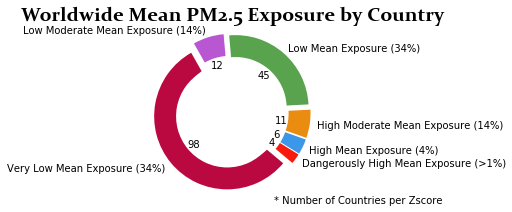

In [34]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

#to show country values not as a %
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

#colors (rpg)
colors = ['#f91a0e','#3c97e8','#ea8c10','#59a34e','#b857d1','#ba0941']

#explsion
explode = (0.08,0.08,0.08,0.08,0.08,0.08)

#format chart
wedges, texts, autotexts = ax.pie(air_data, labels=air_labels, colors=colors, wedgeprops=dict(width=0.3), autopct=autopct_format(air_data),textprops=dict(color="black"), startangle=-40, explode = explode)


#to make circle chart    
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#change font of headers
hfont= {'fontname': 'Constantia'}
tfont = {'fontname': 'Constantia'}

ax.set_title("Worldwide Mean PM2.5 Exposure by Country" , loc='center', **hfont, weight='bold', size=20)

#to add comment at the edge of chart
plt.gcf().text(0.93,0.04,"* Number of Countries per Zscore", ha="right")

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal') 
plt.tight_layout()

plt.savefig('World_PM25_pie.png',dpi=100, bbox_inches = 'tight')
plt.show()

In [35]:
#source['piechart']: https://matplotlib.org/3.1.0/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
#source['data label']:https://stackoverflow.com/questions/53782591/how-to-display-actual-values-instead-of-percentages-on-my-pie-chart-using-matpl
#source['better charts']https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

#### Dataframe for Air Pollution (annual % change)

In [36]:
#2010 won't have data bc there is no 2009 data, thus we will drop it
air_pollu_pct_change_1 = air_pollu_pct_change.drop('2010', axis = 1)

#drop all countries w.o values 
air_pollu_pct_change_2 = air_pollu_pct_change_1.dropna()

#create the % change df 
air_pollu_pct_change_3 = air_pollu_pct_change_2.multiply(100).round(2).reset_index()
air_pollu_pct_change_3.head()

#below are percentages

,Country Name,2011,2012,2013,2014,2015,2016,2017
0,Pacific island small states,1.37,-6.98,-4.67,-3.53,-0.17,-5.75,-0.35
1,Small states,0.86,1.49,-0.67,-3.27,8.77,-4.39,1.27
2,Afghanistan,2.44,-1.23,-7.04,-3.85,3.80,-8.10,1.10
3,Albania,7.00,-9.62,-3.11,-5.32,3.34,-6.77,0.05
4,Algeria,0.56,-1.36,2.64,3.82,1.49,10.42,-2.43


In [37]:
#to create a total column
air_pollu_pct_change_3['Total % Change'] = air_pollu_pct_change_3.iloc[:,1:].sum(axis = 1)
air_pollu_pct_change_3.head()

,Country Name,2011,2012,2013,2014,2015,2016,2017,Total % Change
0,Pacific island small states,1.37,-6.98,-4.67,-3.53,-0.17,-5.75,-0.35,-20.08
1,Small states,0.86,1.49,-0.67,-3.27,8.77,-4.39,1.27,4.06
2,Afghanistan,2.44,-1.23,-7.04,-3.85,3.80,-8.10,1.10,-12.88
3,Albania,7.00,-9.62,-3.11,-5.32,3.34,-6.77,0.05,-14.43
4,Algeria,0.56,-1.36,2.64,3.82,1.49,10.42,-2.43,15.14


### <font color= purple> Dataframe for GDP </font>

#### Dataframe for GDP (2010 Constant USD$)

In [38]:
#filter df by GDP Constant
GDP_con_df = df_final.loc[df_final["Indicator Name"]== 'GDP (constant 2010 US$)']

In [39]:
#filter df by GDP % growth
GDP_df_draft = df_final.loc[df_final["Indicator Name"]== 'GDP (constant 2010 US$)']
GDP_df = GDP_df_draft.drop('Indicator Name', axis=1)
GDP_df = GDP_df.set_index('Country Name').reset_index()

In [40]:
#to create a subtotals row for annual GDP
gdp_annual_totals_per_year = GDP_df.iloc[:,1:].sum(axis = 0)
gdp_annual_totals_per_year = list(gdp_annual_totals_per_year.values)

In [41]:
#make subtotal list into dataframe,using in a row format
GDP_growth_subtotals = pd.DataFrame({'Total GDP per Year':gdp_annual_totals_per_year }).T
#to rename index to fit 'GDP_per_growth_df'
GDP_growth_subtotals.index.name = 'Country Name'
GDP_growth_subtotals = GDP_growth_subtotals.rename(columns = {0: '2010',
                                                              1:"2011",
                                                              2:'2012',
                                                              3:'2013',
                                                              4:'2014',
                                                              5:'2015',
                                                              6:'2016',
                                                              7:'2017'   
                                                              }).reset_index()
GDP_growth_subtotals

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017
0,Total GDP per Year,6.173469e+13,6.364073e+13,6.526190e+13,6.701777e+13,6.895413e+13,7.104548e+13,7.287522e+13,7.518124e+13


In [42]:
#to create a GDP Annual Growth subtotal row for per year 
GDP_growth_subtotals_df = pd.concat([GDP_df,GDP_growth_subtotals],axis=0, join='outer', ignore_index=True)

In [43]:
#to create a total column
GDP_growth_subtotals_df['Total GDP'] = GDP_growth_subtotals_df.iloc[:,1:].sum(axis = 1)

In [44]:
#to isolate total GDP for world
GDP_growth_subtotals_df.iloc[-1,9]

545711158127999.7

In [45]:
# to calculate % of gdp distribution
GDP_growth_subtotals_df['Total GDP %'] = ((GDP_growth_subtotals_df.iloc[:,9]/GDP_growth_subtotals_df.iloc[-1,9]) * 100).round(2)
GDP_growth_subtotals_df.tail()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,Total GDP,Total GDP %
194,Vietnam,1.159320e+11,1.231660e+11,1.296290e+11,1.366580e+11,1.448350e+11,1.545090e+11,1.641050e+11,1.752840e+11,1.144118e+12,0.21
195,West Bank and Gaza,8.913100e+09,1.001954e+10,1.064919e+10,1.088533e+10,1.086553e+10,1.123808e+10,1.176722e+10,1.213674e+10,8.647472e+10,0.02
196,Zambia,2.026556e+10,2.139326e+10,2.301864e+10,2.418324e+10,2.531884e+10,2.605812e+10,2.703717e+10,2.795729e+10,1.952321e+11,0.04
197,Zimbabwe,1.204166e+10,1.375084e+10,1.604247e+10,1.636164e+10,1.675054e+10,1.704868e+10,1.717755e+10,1.798558e+10,1.271590e+11,0.02
198,Total GDP per Year,6.173469e+13,6.364073e+13,6.526190e+13,6.701777e+13,6.895413e+13,7.104548e+13,7.287522e+13,7.518124e+13,5.457112e+14,100.00


Calculate Bins

In [46]:
#to remove subtotal row for Zscore Calc
GDP_bin_df = GDP_growth_subtotals_df[0:-1]
GDP_bin_df.tail()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,Total GDP,Total GDP %
193,Vanuatu,7.008043e+08,7.093767e+08,7.218245e+08,7.360383e+08,7.531954e+08,7.471616e+08,7.770523e+08,8.120250e+08,5.957478e+09,0.00
194,Vietnam,1.159320e+11,1.231660e+11,1.296290e+11,1.366580e+11,1.448350e+11,1.545090e+11,1.641050e+11,1.752840e+11,1.144118e+12,0.21
195,West Bank and Gaza,8.913100e+09,1.001954e+10,1.064919e+10,1.088533e+10,1.086553e+10,1.123808e+10,1.176722e+10,1.213674e+10,8.647472e+10,0.02
196,Zambia,2.026556e+10,2.139326e+10,2.301864e+10,2.418324e+10,2.531884e+10,2.605812e+10,2.703717e+10,2.795729e+10,1.952321e+11,0.04
197,Zimbabwe,1.204166e+10,1.375084e+10,1.604247e+10,1.636164e+10,1.675054e+10,1.704868e+10,1.717755e+10,1.798558e+10,1.271590e+11,0.02


In [47]:
#to get zscore for Total GDP%
GDP_bin_subtotals_std = stats.zscore(GDP_bin_df['Total GDP %'], axis=0).astype(float).round(2)
#set zscore to list
GDP_bin_subtotals_std_list =list(GDP_bin_subtotals_std)
#create a new column
GDP_bin_df['Zscore'] = GDP_bin_subtotals_std_list

In [48]:
# create bins which will allow us to extract data related to hypothesis

GDP_bins = []

for rows in GDP_bin_df['Zscore']:
     if -1 < rows <= 0:
        rows = 'Very Low GDP (34%)'
     elif 0 < rows <= 1:
        rows = 'Low GDP (34%)'
     elif -1 > rows >= -2:
        rows = 'Moderate GDP (27%)'
     elif  1 < rows <= 2:
        rows = 'Moderate GDP (27%)'  
     elif -2 > rows >= -3:
        rows = 'High GDP (4%)'
     elif  2 < rows <= 3:
        rows = 'High GDP (4%)'
     elif -3 > rows >= GDP_bin_df['Zscore'].min():
        rows = 'Very High GDP (>1%)'
     elif 3 < rows <= GDP_bin_df['Zscore'].max():
        rows = 'Very High GDP (>1%)'  
     GDP_bins.append(rows)

In [49]:
GDP_bin_df['Total GDP Bins'] = GDP_bins

In [50]:
summary_gdp_table = GDP_bin_df.groupby('Total GDP Bins')['Country Name'].count().reset_index(name= '# of Countries')
summary_gdp_table

,Total GDP Bins,# of Countries
0,High GDP (4%),1
1,Low GDP (34%),19
2,Moderate GDP (27%),5
3,Very High GDP (>1%),3
4,Very Low GDP (34%),170


In [51]:
#set labels and data for pie chart
gdp_labels = list(summary_gdp_table['Total GDP Bins'])
gdp_data = list(summary_gdp_table['# of Countries'])

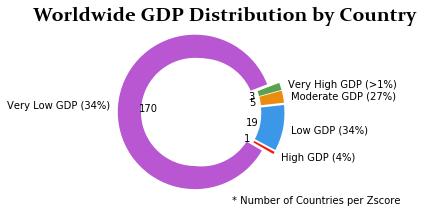

In [52]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

#to show country values not as a %
def autopct_format(values):
    def my_format(pct):
        total = sum(values)  
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

#colors (rpg)
colors = ['#f91a0e','#3c97e8','#ea8c10','#59a34e','#b857d1','#ba0941']

#explsion
explode = (0.08,0.08,0.08,0.08,0.08)

#format chart
wedges, texts, autotexts = ax.pie(gdp_data, labels=gdp_labels, colors=colors, wedgeprops=dict(width=0.3), autopct=autopct_format(gdp_data),textprops=dict(color="black"), startangle=-30, explode = explode)


#to make circle chart    
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#change font of headers
hfont= {'fontname': 'Constantia'}
tfont = {'fontname': 'Constantia'}

ax.set_title("Worldwide GDP Distribution by Country" , loc='left', **hfont, weight='bold', size=20)

#to add comment at the edge of chart
plt.gcf().text(0.93,0.04,"* Number of Countries per Zscore", ha="right")

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal') 
plt.tight_layout()

plt.savefig('World_GDP_pie.png',dpi=100, bbox_inches = 'tight')
plt.show()

### <font color = orange> Dataframe for Population </font>

#### Dataframe for Total Population

In [53]:
#filter df by Population, Total
pop_total_df = df_final.loc[df_final["Indicator Name"]== 'Population, total']
pop_total_df.head()

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017
58707,Pacific island small states,"Population, total",2214096.0,2242763.0,2271298.0,2300045.0,2329458.0,2358955.0,2388875.0,2418415.0
63504,Small states,"Population, total",35465245.0,36171934.0,36875022.0,37572012.0,38266156.0,38960406.0,39646847.0,40330352.0
76296,Afghanistan,"Population, total",28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
77895,Albania,"Population, total",2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
79494,Algeria,"Population, total",36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0,40606052.0,41318142.0


In [54]:
#to drop unnessary columns
population_df = pop_total_df.drop('Indicator Name', axis=1)
population_df = population_df.set_index('Country Name').reset_index()

In [55]:
#to create a subtotals row for annual Population total
population_df_per_year = population_df.iloc[:,1:].sum(axis = 0)
population_subtotals_per_year = list(population_df_per_year.values)

In [56]:
#make subtotal list into dataframe,using in a row format
Population_subtotals = pd.DataFrame({'Total Popu. per Year':population_subtotals_per_year}).T
#to rename index to fit with merging df
Population_subtotals.index.name = 'Country Name'
Population_subtotals = Population_subtotals.rename(columns = {0: '2010',
                                                              1:"2011",
                                                              2:'2012',
                                                              3:'2013',
                                                              4:'2014',
                                                              5:'2015',
                                                              6:'2016',
                                                              7:'2017'   
                                                              }).reset_index()
Population_subtotals

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017
0,Total Popu. per Year,6.382806e+09,6.457974e+09,6.531058e+09,6.609704e+09,6.688866e+09,6.767884e+09,6.847184e+09,6.925742e+09


In [57]:
#to create a Total Population subtotal row for per year 
Population_subtotals_df = pd.concat([population_df,Population_subtotals],axis=0, join='outer', ignore_index=True)
Population_subtotals_df.tail()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017
194,Vietnam,8.847251e+07,8.943664e+07,9.045188e+07,9.149772e+07,9.254492e+07,9.357157e+07,9.456907e+07,9.554080e+07
195,West Bank and Gaza,3.811102e+06,3.927051e+06,4.046901e+06,4.169506e+06,4.294682e+06,4.422143e+06,4.551566e+06,4.684777e+06
196,Zambia,1.385003e+07,1.426476e+07,1.469994e+07,1.515321e+07,1.562097e+07,1.610059e+07,1.659139e+07,1.709413e+07
197,Zimbabwe,1.408632e+07,1.438665e+07,1.471083e+07,1.505451e+07,1.541168e+07,1.577745e+07,1.615036e+07,1.652990e+07
198,Total Popu. per Year,6.382806e+09,6.457974e+09,6.531058e+09,6.609704e+09,6.688866e+09,6.767884e+09,6.847184e+09,6.925742e+09


In [58]:
#to create a total column
Population_subtotals_df['Total Population'] = Population_subtotals_df.iloc[:,1:].sum(axis = 1)
Population_subtotals_df.tail()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,Total Population
194,Vietnam,8.847251e+07,8.943664e+07,9.045188e+07,9.149772e+07,9.254492e+07,9.357157e+07,9.456907e+07,9.554080e+07,7.360851e+08
195,West Bank and Gaza,3.811102e+06,3.927051e+06,4.046901e+06,4.169506e+06,4.294682e+06,4.422143e+06,4.551566e+06,4.684777e+06,3.390773e+07
196,Zambia,1.385003e+07,1.426476e+07,1.469994e+07,1.515321e+07,1.562097e+07,1.610059e+07,1.659139e+07,1.709413e+07,1.233750e+08
197,Zimbabwe,1.408632e+07,1.438665e+07,1.471083e+07,1.505451e+07,1.541168e+07,1.577745e+07,1.615036e+07,1.652990e+07,1.221077e+08
198,Total Popu. per Year,6.382806e+09,6.457974e+09,6.531058e+09,6.609704e+09,6.688866e+09,6.767884e+09,6.847184e+09,6.925742e+09,5.321122e+10


In [64]:
# to calculate % of population distribution
Population_subtotals_df['Total Population %'] = ((Population_subtotals_df.iloc[:,9]/Population_subtotals_df.iloc[-1,9]) * 100).round(2)
Population_subtotals_df.tail()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,Total Population,Total Population %
194,Vietnam,8.847251e+07,8.943664e+07,9.045188e+07,9.149772e+07,9.254492e+07,9.357157e+07,9.456907e+07,9.554080e+07,7.360851e+08,1.38
195,West Bank and Gaza,3.811102e+06,3.927051e+06,4.046901e+06,4.169506e+06,4.294682e+06,4.422143e+06,4.551566e+06,4.684777e+06,3.390773e+07,0.06
196,Zambia,1.385003e+07,1.426476e+07,1.469994e+07,1.515321e+07,1.562097e+07,1.610059e+07,1.659139e+07,1.709413e+07,1.233750e+08,0.23
197,Zimbabwe,1.408632e+07,1.438665e+07,1.471083e+07,1.505451e+07,1.541168e+07,1.577745e+07,1.615036e+07,1.652990e+07,1.221077e+08,0.23
198,Total Popu. per Year,6.382806e+09,6.457974e+09,6.531058e+09,6.609704e+09,6.688866e+09,6.767884e+09,6.847184e+09,6.925742e+09,5.321122e+10,100.00


Calculate Bins

In [65]:
#to remove subtotal row for Zscore Calc
pop_bin_df = Population_subtotals_df[0:-1]
pop_bin_df.tail()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,Total Population,Total Population %
193,Vanuatu,236295.0,241871.0,247485.0,253142.0,258850.0,264603.0,270402.0,276244.0,2048892.0,0.00
194,Vietnam,88472512.0,89436644.0,90451881.0,91497725.0,92544915.0,93571567.0,94569072.0,95540800.0,736085116.0,1.38
195,West Bank and Gaza,3811102.0,3927051.0,4046901.0,4169506.0,4294682.0,4422143.0,4551566.0,4684777.0,33907728.0,0.06
196,Zambia,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0,123375017.0,0.23
197,Zimbabwe,14086317.0,14386649.0,14710826.0,15054506.0,15411675.0,15777451.0,16150362.0,16529904.0,122107690.0,0.23


In [66]:
#to get zscore for Total GDP%
pop_bin_subtotals_std = stats.zscore(pop_bin_df['Total Population %'], axis=0).astype(float).round(2)
#set zscore to list
pop_bin_subtotals_std_list =list(pop_bin_subtotals_std)
#create a new column
pop_bin_df['Zscore'] = pop_bin_subtotals_std_list

In [67]:
# create bins which will allow us to extract data related to hypothesis
pop_bins = []

for rows in pop_bin_df['Zscore']:
     if -1 < rows <= 0:
        rows = 'Very Low Population (34%)'
     elif 0 < rows <= 1:
        rows = 'Low Population (34%)'
     elif -1 > rows >= -2:
        rows = 'Moderate Population (27%)'
     elif  1 < rows <= 2:
        rows = 'Moderate Population (27%)'  
     elif -2 > rows >= -3:
        rows = 'High Population (4%)'
     elif  2 < rows <= 3:
        rows = 'High Population (4%)'
     elif -3 > rows >= pop_bin_df['Zscore'].min():
        rows = 'Very High Population (>1%)'
     elif 3 < rows <= pop_bin_df['Zscore'].max():
        rows = 'Very High Population (>1%)' 
     pop_bins.append(rows)

In [68]:
#to create new column for population bins
pop_bin_df['Population Bins'] = pop_bins

In [74]:
pop_bin_df.loc[pop_bin_df['Population Bins'] == 'Very High Population (>1%)']

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,Total Population,Total Population %,Zscore,Population Bins
40,China,1.337705e+09,1.344130e+09,1.350695e+09,1.357380e+09,1.364270e+09,1.371220e+09,1.378665e+09,1.386395e+09,1.089046e+10,20.47,9.70,Very High Population (>1%)
81,India,1.230981e+09,1.247236e+09,1.263066e+09,1.278562e+09,1.293859e+09,1.309054e+09,1.324171e+09,1.339180e+09,1.028611e+10,19.33,9.14,Very High Population (>1%)


In [69]:
#to create table of values for chart
summary_pop_table = pop_bin_df.groupby('Population Bins')['Country Name'].count().reset_index(name= '# of Countries')
summary_pop_table

,Population Bins,# of Countries
0,High Population (4%),1
1,Low Population (34%),27
2,Moderate Population (27%),4
3,Very High Population (>1%),2
4,Very Low Population (34%),164


In [75]:
#set labels and data for pie chart
pop_labels = list(summary_pop_table['Population Bins'])
pop_data = list(summary_pop_table['# of Countries'])

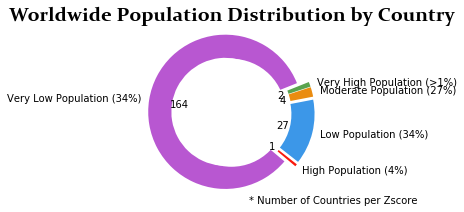

In [76]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

#to show country values not as a %
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

#colors (rpg)
colors = ['#f91a0e','#3c97e8','#ea8c10','#59a34e','#b857d1','#ba0941']

#explsion
explode = (0.08,0.08,0.08,0.08,0.08)

#format chart
wedges, texts, autotexts = ax.pie(pop_data, labels=pop_labels, colors=colors, wedgeprops=dict(width=.30), autopct=autopct_format(pop_data),textprops=dict(color="black"), startangle=-40, explode = explode)


#to make circle chart    
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#change font of headers
hfont= {'fontname': 'Constantia'}
tfont = {'fontname': 'Constantia'}

ax.set_title("Worldwide Population Distribution by Country" , loc='center', **hfont, weight='bold', size=20)

#to add comment at the edge of chart
plt.gcf().text(0.93,0.04,"* Number of Countries per Zscore", ha="right")

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal') 
plt.tight_layout()
plt.savefig('World_Pop_pie.png',dpi=100, bbox_inches = 'tight')
plt.show()

### <font color= 'blue'> Summary Pie Graph </font>

In [ ]:
# Data to plot
fig, ax = plt.subplots()#subplot_kw=dict(polar=True))

#6x1 colors (blue)
colors_air = ['#286caf', '#357dc4', '#5d9bd8', '#75aadd','#9dccf9','#c4e1fc']

# 5x6 rows of the same color (purple)
colors_pop = ['#5f3172','#944cb2', '#b65edb','#cf6bf9', '#dd98f9',
              '#5f3172','#944cb2', '#b65edb','#cf6bf9', '#dd98f9',
              '#5f3172','#944cb2', '#b65edb','#cf6bf9', '#dd98f9',
              '#5f3172','#944cb2', '#b65edb','#cf6bf9', '#dd98f9',
              '#5f3172','#944cb2', '#b65edb','#cf6bf9', '#dd98f9',
              '#5f3172','#944cb2', '#b65edb','#cf6bf9', '#dd98f9']


#explode
explode_air= (0.2,0.2,0.2,0.2,0.2,0.2) 
              
explode_pop= (0.1,0.1,0.1,0.1,0.1)
              #0.1,0.1,0.1,0.1,0.1,
           #   0.1,0.1,0.1,0.1,0.1,
           #   0.1,0.1,0.1,0.1,0.1,
           #   0.1,0.1,0.1,0.1,0.1,
          #    0.1,0.1,0.1,0.1,0.1)
              

                #
                #explode=explode_pop
# Plot
ax.pie(air_data,labels= air_labels, colors=colors_air,explode=explode_air,wedgeprops=dict(width=.75),radius=3, startangle=-40,frame=True)

ax.pie(pop_data,labels= pop_labels, colors=colors_pop,explode=explode_pop,wedgeprops=dict(width=.75),radius=2,startangle=-45)



centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
#plt.tight_layout()
plt.show()

#### Dataframe for Population Growth (annual %)

In [ ]:
#filter df by Population, (annual %)
pop_per_growth_df = df_final.loc[df_final["Indicator Name"]== 'Population growth (annual %)']
pop_per_growth_df.head()

### <font color = 'grey'> Dataframe for CO2 </font>

In [ ]:
csv_path = "../Project_1_AirPollution_vs_GDPperCapita/Original CO2 emissions dataset.csv"
CO2data_df = pd.read_csv(csv_path, encoding = 'unicode_escape')
CO2data_df.head()

##Code written by Joyce Wang

In [ ]:
CO2data_df_headers=list(CO2data_df.columns)
CO2data_df_years = CO2data_df_headers[-59:]
CO2data_df_years_drop = CO2data_df_years[1:51]
CO2data_df_1= CO2data_df.drop(CO2data_df_years_drop,axis=1).dropna().round(0)
CO2data_df_1.head()

##Code written by Joyce Wang

In [ ]:
CO2data_df_2 = CO2data_df_1.rename(index=str, columns={"Country": "Country Name"})
CO2data_df_2.head()
##Code written by Joyce Wang

In [ ]:
## starting josefina's additions
#to create a subtotals row for annual CO2
Co2_annual_totals_per_year = CO2data_df_1.iloc[:,1:].sum(axis = 0)
Co2_annual_totals_per_year = list(Co2_annual_totals_per_year.values)

In [ ]:
#make subtotal list into dataframe,using in a row format
CO2_subtotals = pd.DataFrame({'Total Co2 per Year':Co2_annual_totals_per_year}).T.round(0)
#to rename index to fit mergin df
CO2_subtotals.index.name = 'Country Name'
CO2_subtotals = CO2_subtotals.rename(columns = {0: '2010',
                                                1:"2011",
                                                2:'2012',
                                                3:'2013',
                                                4:'2014',
                                                5:'2015',
                                                6:'2016',
                                                7:'2017'   
                                                }).reset_index()
CO2_subtotals

In [ ]:
#to create a Total Population subtotal row for per year 
CO2_subtotals_df = pd.concat([CO2data_df_2,CO2_subtotals],axis=0, join='outer', ignore_index=True)
CO2_subtotals_df.tail()

In [ ]:
#to create a total column
CO2_subtotals_df['Total CO2'] = CO2_subtotals_df.iloc[:,1:].sum(axis = 1)
CO2_subtotals_df.tail()

In [ ]:
# to calculate % of population distribution
CO2_subtotals_df['Total CO2 %'] = ((CO2_subtotals_df.iloc[:,9]/CO2_subtotals_df.iloc[-1,9]) * 100).round(2)
CO2_subtotals_df.tail()

In [ ]:
#to remove subtotal row for Zscore Calc
co2_bin_df = CO2_subtotals_df[0:-1]
co2_bin_df.tail()

In [ ]:
#to get zscore for Total GDP%
Co2_bin_subtotals_std = stats.zscore(co2_bin_df['Total CO2 %'], axis=0).astype(float).round(2)
#set zscore to list
co2_bin_subtotals_std_list =list(Co2_bin_subtotals_std)
#create a new column
co2_bin_df['Zscore'] =co2_bin_subtotals_std_list
co2_bin_df['Zscore'].describe()

In [ ]:
# create bins which will allow us to extract data related to hypothesis
co2_bins = []

for rows in co2_bin_df['Zscore']:
     if -1 < rows <= 0:
        rows = 'Low CO2 (34%)'
     elif 0 < rows <= 1:
        rows = 'Low CO2 (34%)'
     elif -1 > rows >= -2:
        rows = 'Moderate Population (27%)'
     elif  1 < rows <= 2:
        rows = 'Moderate Population (27%)'  
     elif -2 > rows >= -3:
        rows = 'High Population (4%)'
     elif  2 < rows <= 3:
        rows = 'High Population (4%)'
     elif -3 > rows >= pop_bin_df['Zscore'].min():
        rows = 'Very High Population (>1%)'
     elif 3 < rows <= pop_bin_df['Zscore'].max():
        rows = 'Very High Population (>1%)' 
     co2_bins.append(rows)

In [ ]:
#to create new column for population bins
co2_bin_df['CO2 Bins'] = co2_bins

In [ ]:
co2_bin_df.loc[co2_bin_df['CO2 Bins'] == 'Low CO2 (34%)']

### <font color= green> Dataframe for World Charts </font>

In [ ]:
df_w = df_columns_removed.loc[df_columns_removed['Indicator Name'].isin(list_indicators )].drop(['Country Code','Indicator Code'],axis=1)
df_w.head()

In [ ]:
df_w_1 = df_w.loc[df_w['Country Name'] == 'World']
df_w_2 = df_w_1.drop('Country Name', axis= 1)
df_w_3 = df_w_2.rename(columns={'Indicator Name':'Years'})
df_w_4 = df_w_3.set_index("Years").T
df_w_4.head()

In [ ]:
world_data = df_w_4.rename(columns={
                           "PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)":"PM2.5 Air Pollution (Mean Exposure)",
                           "Population, total":"Total Population"
                           })


world_data = world_data.apply(pd.to_numeric).round(2)
world_data

In [ ]:
#below is a summary table of the world data (no outliers removed)
world_data['PM2.5 Air Pollution(annual %)']=world_data['PM2.5 Air Pollution (Mean Exposure)'].pct_change()
world_data['PM2.5 Air Pollution(annual %)']=world_data['PM2.5 Air Pollution(annual %)']*100
world_data

In [ ]:
#create a table just for %s
world_data_per_growth_all = world_data.drop(['GDP (constant 2010 US$)','PM2.5 Air Pollution (Mean Exposure)','Total Population'], axis = 1)
#removing 2010 data for review
world_data_per_growth = world_data_per_growth_all.dropna()
world_data_per_growth

In [ ]:
#Generate a line graph plot    
ax = world_data_per_growth.plot.line(marker ="o",grid= True, figsize=(6,4), fontsize = 12)

#label axises
ax.set_ylabel("Growth Annual %")
ax.set_xlabel("Years")
ax.set_title('Anticipated Pollution Contributing Factors')

#format margins
ax.autoscale()
ax.use_sticky_edges = False

#assign font to legend
plt.legend(fontsize = 'small',loc='center left', bbox_to_anchor=(1, 0.5))

#format xticks
plt.yticks(np.arange(world_data_per_growth['PM2.5 Air Pollution(annual %)'].min(),world_data_per_growth['GDP growth (annual %)'].max()+1,.5))

# Save the Figure
plt.savefig('Anticipated_Pollution_Contributing_Factors.png',dpi=150, bbox_inches = 'tight')
plt.show()


In [ ]:
#x_axis_GDP = world_data['GDP growth (annual %)']
#x_axis_population = world_data['Population growth (annual %)']
#x_axis_pm25=world_data['PM2.5 Air Pollution(annual %)']
#plt.plot(x_axis_population, linewidth=1, color="red")
#plt.plot(x_axis_GDP, linewidth=1, color="blue")
#plt.plot(x_axis_pm25, linewidth=1, color="black")

#### Formating Values
The values need to be formated, however, it may be better to do that once the data can be classified as a series rather than a dataframe.

Thus we'll format in the final stage before graphing.